In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [260]:
def read_data(url, header):
    df = pd.read_csv(url, header=header, index_col=0)
    return df

In [281]:
def add_noise(df,scorer,bodypart,coord,n):
    df.loc[filenames[:n],(scorer, bodypart, coord)] = df.loc[filenames[:n],(scorer, bodypart, coord)] + np.mean(df.loc[:,(scorer, bodypart, coord)])
    return df

In [262]:
def swap_ears(df,df_fake,scorer,n):
    df_fake.loc[filenames[:n],(scorer, 'leftear', 'x')] = df.loc[filenames[:n],(scorer, 'rightear', 'x')]
    df_fake.loc[filenames[:n],(scorer, 'leftear', 'y')] = df.loc[filenames[:n],(scorer, 'rightear', 'y')]
    
    df_fake.loc[filenames[:n],(scorer, 'rightear', 'x')] = df.loc[filenames[:n],(scorer, 'leftear', 'x')]
    df_fake.loc[filenames[:n],(scorer, 'rightear', 'y')] = df.loc[filenames[:n],(scorer, 'leftear', 'y')]
    return df_fake

In [263]:
url = 'https://raw.githubusercontent.com/DeepLabCut/DeepLabCut/master/examples/openfield-Pranav-2018-10-30/labeled-data/m4s1/CollectedData_Pranav.csv'
header = [0, 1, 2] ### if multi-animal project, header = [0, 1, 2, 3]

df = read_data(url, header)
df

scorer                         Pranav                                     \
bodyparts                       snout          leftear          rightear   
coords                              x        y       x        y        x   
labeled-data/m4s1/img0000.png  21.521  265.428  33.819  265.941   19.984   
labeled-data/m4s1/img0001.png  10.248  288.487  19.984  297.198   12.298   
labeled-data/m4s1/img0002.png  24.596  354.075  38.431  354.075   23.058   
labeled-data/m4s1/img0003.png  73.787  374.572  78.911  366.373   57.390   
labeled-data/m4s1/img0004.png  38.431  333.066  50.729  341.777   39.968   
...                               ...      ...     ...      ...      ...   
labeled-data/m4s1/img0111.png  30.745   65.588  35.356   79.424   42.530   
labeled-data/m4s1/img0112.png  29.207  104.532  36.894  109.143   36.894   
labeled-data/m4s1/img0113.png  30.232  188.567  39.968  181.393   27.670   
labeled-data/m4s1/img0114.png  26.645  262.354  38.431  262.354   24.596   
labeled-data/m4s1/img0115.png  65.588  321.281  72.250  312.058   52.778   

scorer                                                    
bodyparts                              tailbase           
coords                               y        x        y  
labeled-data/m4s1/img0000.png  250.056   87.110  152.698  
labeled-data/m4s1/img0001.png  281.313   95.821  221.361  
labeled-data/m4s1/img0002.png  337.166   99.408  256.205  
labeled-data/m4s1/img0003.png  361.761  106.581  270.040  
labeled-data/m4s1/img0004.png  323.331  131.177  273.627  
...                                ...      ...      ...  
labeled-data/m4s1/img0111.png   60.977  138.863   97.870  
labeled-data/m4s1/img0112.png   89.672  143.987   89.159  
labeled-data/m4s1/img0113.png  167.046  112.218   96.845  
labeled-data/m4s1/img0114.png  248.519   84.548  155.773  
labeled-data/m4s1/img0115.png  306.934   92.746  192.154  

[116 rows x 8 columns]

In [291]:
# adding fake data
df_fake = df.copy(deep=True)
filenames = df_fake.index
scorer = 'Pranav'
bodypart = 'snout'
n = 5 # 5 pictures with bad labels

In [292]:
# add random noise
df_fake_noise = add_noise(df_fake,scorer,bodypart,'x',n)
df_fake_noise = add_noise(df_fake,scorer,bodypart,'y',n)
df_fake_noise.head()

scorer                             Pranav                               \
bodyparts                           snout             leftear            
coords                                  x           y       x        y   
labeled-data/m4s1/img0000.png   78.910922  530.882879  33.819  265.941   
labeled-data/m4s1/img0001.png   67.637922  553.941879  19.984  297.198   
labeled-data/m4s1/img0002.png   81.985922  619.529879  38.431  354.075   
labeled-data/m4s1/img0003.png  131.176922  640.026879  78.911  366.373   
labeled-data/m4s1/img0004.png   95.820922  598.520879  50.729  341.777   

scorer                                                             
bodyparts                     rightear          tailbase           
coords                               x        y        x        y  
labeled-data/m4s1/img0000.png   19.984  250.056   87.110  152.698  
labeled-data/m4s1/img0001.png   12.298  281.313   95.821  221.361  
labeled-data/m4s1/img0002.png   23.058  337.166   99.408  256.205  
labeled-data/m4s1/img0003.png   57.390  361.761  106.581  270.040  
labeled-data/m4s1/img0004.png   39.968  323.331  131.177  273.627

In [295]:
df_features = pd.DataFrame()

df_features['ears'] = np.sqrt(np.square(df_fake_noise.loc[:,(scorer, 'leftear', 'x')] - df_fake_noise.loc[:,(scorer, 'rightear', 'x')])+np.square(df_fake_noise.loc[:,(scorer, 'leftear', 'y')] - df_fake_noise.loc[:,(scorer, 'rightear', 'y')])) 
df_features['tailbase_snout'] = np.sqrt(np.square(df_fake_noise.loc[:,(scorer, 'snout', 'x')] - df_fake_noise.loc[:,(scorer, 'tailbase', 'x')])+np.square(df_fake_noise.loc[:,(scorer, 'snout', 'y')] - df_fake_noise.loc[:,(scorer, 'tailbase', 'y')])) 

df_features.head()

,ears,tailbase_snout
labeled-data/m4s1/img0000.png,21.065148,378.273747
labeled-data/m4s1/img0001.png,17.646751,333.772868
labeled-data/m4s1/img0002.png,22.852646,363.742349
labeled-data/m4s1/img0003.png,22.009634,370.803520
labeled-data/m4s1/img0004.png,21.355422,326.812003


In [212]:
#swap ears
'''df_swap_ears = swap_ears(df,df_fake,scorer,n)
df_swap_ears.head()'''

scorer                         Pranav                                     \
bodyparts                       snout          leftear          rightear   
coords                              x        y       x        y        x   
labeled-data/m4s1/img0000.png  21.521  265.428  19.984  250.056   33.819   
labeled-data/m4s1/img0001.png  10.248  288.487  12.298  281.313   19.984   
labeled-data/m4s1/img0002.png  24.596  354.075  23.058  337.166   38.431   
labeled-data/m4s1/img0003.png  73.787  374.572  57.390  361.761   78.911   
labeled-data/m4s1/img0004.png  38.431  333.066  39.968  323.331   50.729   

scorer                                                    
bodyparts                              tailbase           
coords                               y        x        y  
labeled-data/m4s1/img0000.png  265.941   87.110  152.698  
labeled-data/m4s1/img0001.png  297.198   95.821  221.361  
labeled-data/m4s1/img0002.png  354.075   99.408  256.205  
labeled-data/m4s1/img0003.png  366.373  106.581  270.040  
labeled-data/m4s1/img0004.png  341.777  131.177  273.627

In [297]:
from sklearn.preprocessing import StandardScaler

x1 = StandardScaler().fit_transform(df_features) # standart scaler
features_noise = pd.DataFrame(x1)
features_noise.columns = df_features.columns

features_noise.head()

,ears,tailbase_snout
0,0.570611,5.121125
1,-0.954158,4.208409
2,1.367921,4.823085
3,0.991897,4.967910
4,0.700087,4.065641


In [275]:
'''x2 = StandardScaler().fit_transform(df_swap_ears) # standart scaler
features_swap_ears = pd.DataFrame(x2)
features_swap_ears.columns = df.columns
features_swap_ears.head()'''

'x2 = StandardScaler().fit_transform(df_swap_ears) # standart scaler\nfeatures_swap_ears = pd.DataFrame(x2)\nfeatures_swap_ears.columns = df.columns\nfeatures_swap_ears.head()'

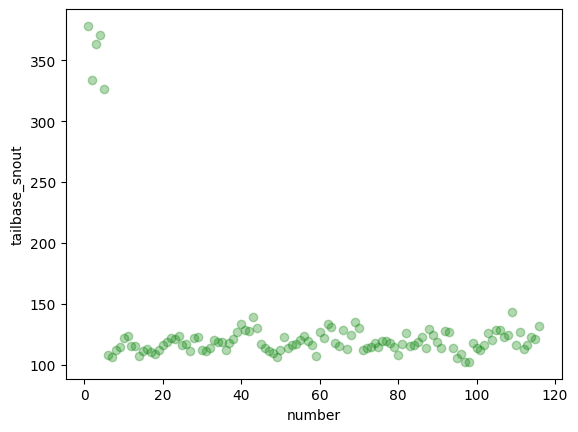

In [296]:
names = list(range(1, df_features.shape[0]+1))
plt.scatter(names, df_features['tailbase_snout'], alpha=.3, color='green')
plt.xlabel('number')
plt.ylabel('tailbase_snout')
plt.show()

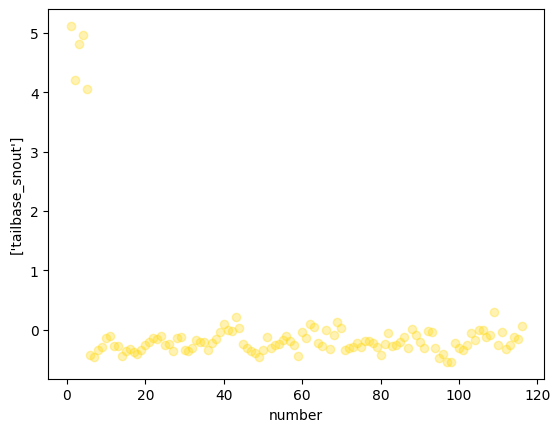

In [301]:
plt.scatter(names, features_noise[['tailbase_snout']], alpha=.3, color='gold')
plt.xlabel('number')
plt.ylabel(['tailbase_snout'])
plt.show()

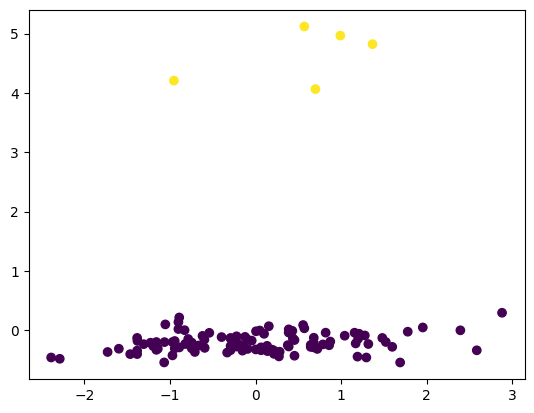

In [302]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2)
model.fit(features_noise.iloc[:,:2])

labels = model.predict(features_noise.iloc[:,:2])
plt.scatter(features_noise['ears'], features_noise['tailbase_snout'], c=labels)
plt.show()


In [69]:
'''
Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

The main concept of DBSCAN algorithm is to locate regions of high density 
that are separated from one another by regions of low density 

'''

'\nDensity-Based Spatial Clustering of Applications with Noise (DBSCAN)\n\nThe main concept of DBSCAN algorithm is to locate regions of high density \nthat are separated from one another by regions of low density \n\n'

In [415]:
def show_clusters(X, cluster):
    df = X
    df.loc[:,'label'] = cluster
    colors = {-1: 'red', 0: 'blue', 1:'orange', 2:'green', 3:'yellow', 4:'black', 5:'gold', 6:'lightblue', 7:'darkgreen'}
    fig, ax = plt.subplots(figsize=(8,8))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x=0, y=1, label=key, color=colors[key])
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.show()
    #, 1:'orange', 2:'green', 3:'yellow'

In [509]:
from sklearn.cluster import DBSCAN

# min_samples = the minimum number of core points needed in order to form a cluster
# eps = the maximum distance between two samples for them to be considered as in the same cluster

dbscan=DBSCAN(eps = 0.9, min_samples = 6)

# fit - perform DBSCAN clustering from features, or distance matrix.
dbscan = dbscan.fit(features_noise)

In [510]:
cluster = dbscan.labels_
len(set(cluster))

2

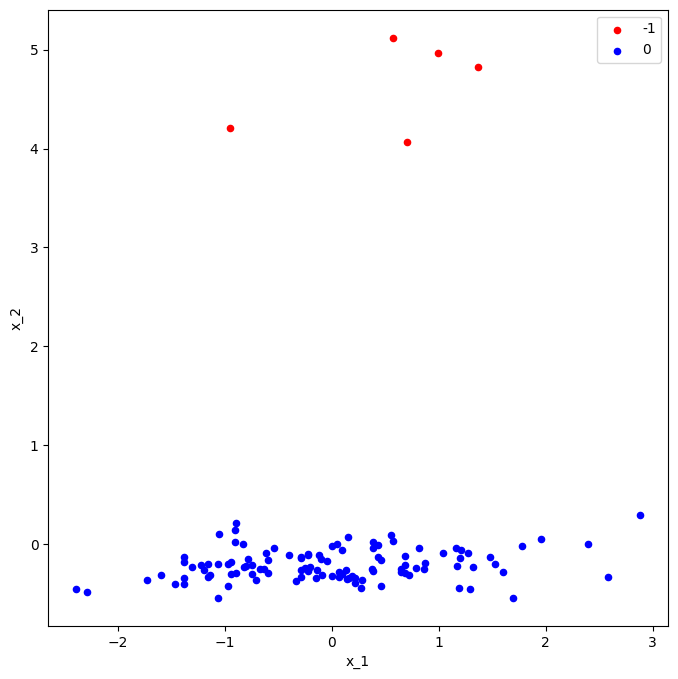

In [511]:
show_clusters(features_noise, cluster)

In [512]:
features_noise['labels'] = dbscan.labels_
features_noise.head()

,ears,tailbase_snout,labels,label
0,0.570611,5.121125,-1,-1
1,-0.954158,4.208409,-1,-1
2,1.367921,4.823085,-1,-1
3,0.991897,4.967910,-1,-1
4,0.700087,4.065641,-1,-1


In [513]:
(features_noise['labels'] == -1).sum()

5